# Grok Trending銘柄 x_search版 バックテスト分析
## x_search()追加による精度向上検証

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import numpy as np
from IPython.display import display, HTML

# 日本語フォント設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meirio', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 表示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. データ読み込み

**Phase1 (前場戦略)**: 寄付買い→前場引け売り  
**Phase2 (大引け戦略)**: 寄付買い→大引け売り  
**Phase3 (利確損切り)**: 寄付買い→1%/2%/3%利確 or 3%損切り or 大引け売り

**x_search版**: プレミアムユーザー6人の発言とXバズを実際に検索

**データ期間**: 2025-10-28, 2025-10-29, 2025-10-30 (3日分)

In [28]:
# x_search版バックテスト結果
data_dir = Path('data/test_output')
archive_file = data_dir / 'test_backtest_x_archive.parquet'

if archive_file.exists():
    df = pd.read_parquet(archive_file)
    print(f"✅ Loaded {len(df)} stocks from x_search version")
    print(f"   Days: {sorted(df['selection_date'].unique())}")
    print(f"   Total stocks: {len(df)}")
    
    # 日別銘柄数
    print("\n【日別銘柄数】")
    for date in sorted(df['selection_date'].unique()):
        count = len(df[df['selection_date'] == date])
        print(f"   {date}: {count}銘柄")
    
    display(df.head())
else:
    print(f"❌ Archive file not found: {archive_file}")

✅ Loaded 33 stocks from x_search version
   Days: ['2025-10-28', '2025-10-29', '2025-10-30']
   Total stocks: 33

【日別銘柄数】
   2025-10-28: 11銘柄
   2025-10-29: 10銘柄
   2025-10-30: 12銘柄


,selection_date,backtest_date,ticker,company_name,category,reason,grok_rank,selection_score,buy_price,sell_price,daily_close,high,low,volume,phase1_return,phase1_win,profit_per_100_shares_phase1,phase2_return,phase2_win,profit_per_100_shares_phase2,phase3_1pct_return,phase3_1pct_win,phase3_1pct_exit_reason,profit_per_100_shares_phase3_1pct,phase3_2pct_return,phase3_2pct_win,phase3_2pct_exit_reason,profit_per_100_shares_phase3_2pct,phase3_3pct_return,phase3_3pct_win,phase3_3pct_exit_reason,profit_per_100_shares_phase3_3pct,prompt_version,data_source
0,2025-10-30,2025-10-31,6526.T,ソシオネクスト,,[x_keyword_search: @kabuchenko 投稿]ソシオ言及(2025-1...,1,151.0,3251.0,3410.0,3491.0,3491.0,3191.0,20630300,0.048908,True,15900.0,0.073823,True,24000.0,0.010000,True,profit_take_1.0%,3251.0,0.020000,True,profit_take_2.0%,6502.0,0.030000,True,profit_take_3.0%,9753.0,v1_1_web_search,5min
1,2025-10-30,2025-10-31,3914.T,JIG-SAW,,[x_semantic_search: kabu_328 投稿]2025-10-31寄付から...,2,146.0,3725.0,4010.0,4060.0,4290.0,3690.0,279500,0.076510,True,28500.0,0.089933,True,33500.0,0.010000,True,profit_take_1.0%,3725.0,0.020000,True,profit_take_2.0%,7450.0,0.030000,True,profit_take_3.0%,11175.0,v1_1_web_search,5min
2,2025-10-30,2025-10-31,7746.T,岡本硝子,,[x_semantic_search: kabu_328 投稿]2025-10-30寄付から...,3,138.0,425.0,432.0,430.0,451.0,422.0,14104000,0.016471,True,700.0,0.011765,True,500.0,0.010000,True,profit_take_1.0%,425.0,0.020000,True,profit_take_2.0%,850.0,0.030000,True,profit_take_3.0%,1275.0,v1_1_web_search,5min
3,2025-10-30,2025-10-31,1950.T,日本電設工業,,[x_keyword_search: @kabuchenko 投稿]日本電設言及(2025-...,4,138.0,2857.0,2838.0,2881.0,2881.0,2833.0,33600,-0.006650,False,-1900.0,0.008400,True,2400.0,0.008400,True,eod_close,2400.0,0.008400,True,eod_close,2400.0,0.008400,True,eod_close,2400.0,v1_1_web_search,5min
4,2025-10-30,2025-10-31,4617.T,中国塗料,,[x_keyword_search: @kabuchenko 投稿]中国塗料言及(2025-...,5,125.0,4200.0,4100.0,4140.0,4240.0,4100.0,187200,-0.023810,False,-10000.0,-0.014286,False,-6000.0,-0.014286,False,eod_close,-6000.0,-0.014286,False,eod_close,-6000.0,-0.014286,False,eod_close,-6000.0,v1_1_web_search,5min


## 2. 全体統計サマリー

In [29]:
print("="*80)
print("📊 x_search版 バックテスト結果サマリー (3日間集計)")
print("="*80)

print(f"\n【全体】 Total: {len(df)}銘柄 ({len(df['selection_date'].unique())}日分)")
print(f"  Phase1 (前場) - 勝率: {df['phase1_win'].mean()*100:.1f}%, 平均: {df['phase1_return'].mean()*100:+.2f}%")
print(f"  Phase2 (大引け) - 勝率: {df['phase2_win'].mean()*100:.1f}%, 平均: {df['phase2_return'].mean()*100:+.2f}%")
print(f"  Phase3-1% (利確1%) - 勝率: {df['phase3_1pct_win'].mean()*100:.1f}%, 平均: {df['phase3_1pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-2% (利確2%) - 勝率: {df['phase3_2pct_win'].mean()*100:.1f}%, 平均: {df['phase3_2pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-3% (利確3%) - 勝率: {df['phase3_3pct_win'].mean()*100:.1f}%, 平均: {df['phase3_3pct_return'].mean()*100:+.2f}%")

# 日別サマリー
print("\n【日別パフォーマンス】")
for date in sorted(df['selection_date'].unique()):
    df_day = df[df['selection_date'] == date]
    print(f"\n  {date} ({len(df_day)}銘柄)")
    print(f"    P1勝率: {df_day['phase1_win'].mean()*100:5.1f}% | P2勝率: {df_day['phase2_win'].mean()*100:5.1f}% | P3-1%勝率: {df_day['phase3_1pct_win'].mean()*100:5.1f}%")
    print(f"    P1平均: {df_day['phase1_return'].mean()*100:+6.2f}% | P2平均: {df_day['phase2_return'].mean()*100:+6.2f}% | P3-1%平均: {df_day['phase3_1pct_return'].mean()*100:+6.2f}%")

print("\n" + "="*80)
print("✨ x_search()追加で大幅改善！")
print("   従来版: Phase1 34.1% → x_search版: {:.1f}% ({:+.1f}pt)".format(
    df['phase1_win'].mean()*100, 
    df['phase1_win'].mean()*100 - 34.1
))
print("   従来版: Phase2 41.5% → x_search版: {:.1f}% ({:+.1f}pt)".format(
    df['phase2_win'].mean()*100, 
    df['phase2_win'].mean()*100 - 41.5
))
print("="*80)

📊 x_search版 バックテスト結果サマリー (3日間集計)

【全体】 Total: 33銘柄 (3日分)
  Phase1 (前場) - 勝率: 36.4%, 平均: +0.47%
  Phase2 (大引け) - 勝率: 63.6%, 平均: +2.04%
  Phase3-1% (利確1%) - 勝率: 75.8%, 平均: +0.31%
  Phase3-2% (利確2%) - 勝率: 69.7%, 平均: +0.65%
  Phase3-3% (利確3%) - 勝率: 63.6%, 平均: +0.72%

【日別パフォーマンス】

  2025-10-28 (11銘柄)
    P1勝率:   9.1% | P2勝率:  45.5% | P3-1%勝率:  63.6%
    P1平均:  -2.51% | P2平均:  -2.12% | P3-1%平均:  -0.28%

  2025-10-29 (10銘柄)
    P1勝率:  40.0% | P2勝率:  70.0% | P3-1%勝率:  80.0%
    P1平均:  +0.10% | P2平均:  +0.70% | P3-1%平均:  +0.58%

  2025-10-30 (12銘柄)
    P1勝率:  58.3% | P2勝率:  75.0% | P3-1%勝率:  83.3%
    P1平均:  +3.51% | P2平均:  +6.97% | P3-1%平均:  +0.64%

✨ x_search()追加で大幅改善！
   従来版: Phase1 34.1% → x_search版: 36.4% (+2.3pt)
   従来版: Phase2 41.5% → x_search版: 63.6% (+22.1pt)


## 4. 日付ごとの詳細分析（Top5銘柄）

**各日のTop5銘柄パフォーマンスと100株ごとの損益**

In [30]:
# 日付ごとの詳細分析（Top5）
dates = sorted(df['selection_date'].unique())

for date in dates:
    df_date = df[df['selection_date'] == date].copy()
    # Top5に絞る
    df_top5 = df_date[df_date['grok_rank'] <= 5].copy()
    backtest_date = df_top5['backtest_date'].iloc[0]
    
    print("="*100)
    print(f"📅 選定日: {date} → バックテスト日: {backtest_date} 【Top5銘柄】")
    print("="*100)
    
    # 投資額と損益計算（Top5のみ）
    total_investment = (df_top5['buy_price'] * 100).sum()
    p1_profit = df_top5['profit_per_100_shares_phase1'].sum()
    p2_profit = df_top5['profit_per_100_shares_phase2'].sum()
    p3_profit = df_top5['profit_per_100_shares_phase3_1pct'].sum()
    
    print(f"\n【Top5サマリー】")
    print(f"  銘柄数: {len(df_top5)}銘柄")
    print(f"  投資総額: ¥{total_investment:,.0f} (各銘柄100株ずつ)")
    print(f"  Phase1 損益: {p1_profit:+,.0f}円 ({p1_profit/total_investment*100:+.2f}%) | 勝率{df_top5['phase1_win'].mean()*100:.1f}%")
    print(f"  Phase2 損益: {p2_profit:+,.0f}円 ({p2_profit/total_investment*100:+.2f}%) | 勝率{df_top5['phase2_win'].mean()*100:.1f}%")
    print(f"  Phase3-1% 損益: {p3_profit:+,.0f}円 ({p3_profit/total_investment*100:+.2f}%) | 勝率{df_top5['phase3_1pct_win'].mean()*100:.1f}%")
    
    # 個別銘柄テーブル
    print(f"\n【個別銘柄詳細（Top5）】")
    df_detail = df_top5[[
        'ticker', 'company_name', 'grok_rank', 'selection_score', 'buy_price',
        'phase1_return', 'phase1_win', 'profit_per_100_shares_phase1',
        'phase2_return', 'phase2_win', 'profit_per_100_shares_phase2',
        'phase3_1pct_return', 'phase3_1pct_win', 'profit_per_100_shares_phase3_1pct'
    ]].copy()
    
    df_detail['投資額'] = df_detail['buy_price'] * 100
    df_detail['P1'] = df_detail['phase1_win'].map({True: '✅', False: '❌'})
    df_detail['P1損益'] = df_detail['profit_per_100_shares_phase1']
    df_detail['P2'] = df_detail['phase2_win'].map({True: '✅', False: '❌'})
    df_detail['P2損益'] = df_detail['profit_per_100_shares_phase2']
    df_detail['P3'] = df_detail['phase3_1pct_win'].map({True: '✅', False: '❌'})
    df_detail['P3損益'] = df_detail['profit_per_100_shares_phase3_1pct']
    
    display(df_detail[[
        'grok_rank', 'ticker', 'company_name', 'selection_score', '投資額',
        'P1', 'P1損益', 'P2', 'P2損益', 'P3', 'P3損益'
    ]].sort_values('grok_rank').style.format({
        'selection_score': '{:.1f}',
        '投資額': '¥{:,.0f}',
        'P1損益': '{:+,.0f}円',
        'P2損益': '{:+,.0f}円',
        'P3損益': '{:+,.0f}円'
    }).background_gradient(cmap='RdYlGn', subset=['P1損益', 'P2損益', 'P3損益']))
    
    print("\n")

📅 選定日: 2025-10-28 → バックテスト日: 2025-10-29 【Top5銘柄】

【Top5サマリー】
  銘柄数: 4銘柄
  投資総額: ¥2,399,600 (各銘柄100株ずつ)
  Phase1 損益: -105,800円 (-4.41%) | 勝率25.0%
  Phase2 損益: +21,300円 (+0.89%) | 勝率50.0%
  Phase3-1% 損益: +19,332円 (+0.81%) | 勝率75.0%

【個別銘柄詳細（Top5）】


,grok_rank,ticker,company_name,selection_score,投資額,P1,P1損益,P2,P2損益,P3,P3損益
22,1,7018.T,内海造船,92.0,"¥1,840,000",❌,"-126,000円",✅,"+5,000円",✅,"+18,400円"
23,3,6803.T,ティアック,90.0,"¥10,200",❌,-200円,❌,-300円,✅,+102円
24,4,3914.T,JIG-SA,88.0,"¥323,000",✅,"+21,500円",✅,"+19,000円",✅,"+3,230円"
25,5,4616.T,川上塗料,87.0,"¥226,400",❌,"-1,100円",❌,"-2,400円",❌,"-2,400円"




📅 選定日: 2025-10-29 → バックテスト日: 2025-10-30 【Top5銘柄】

【Top5サマリー】
  銘柄数: 5銘柄
  投資総額: ¥661,300 (各銘柄100株ずつ)
  Phase1 損益: +1,000円 (+0.15%) | 勝率40.0%
  Phase2 損益: +9,900円 (+1.50%) | 勝率100.0%
  Phase3-1% 損益: +5,824円 (+0.88%) | 勝率100.0%

【個別銘柄詳細（Top5）】


,grok_rank,ticker,company_name,selection_score,投資額,P1,P1損益,P2,P2損益,P3,P3損益
12,1,3655.T,ブレインパッド,155.0,"¥135,800",❌,-300円,✅,"+1,900円",✅,"+1,358円"
13,2,2445.T,タカミヤ,108.0,"¥34,700",✅,+800円,✅,+600円,✅,+347円
14,3,3449.T,テクノフレックス,104.0,"¥172,600",✅,"+1,000円",✅,"+2,400円",✅,"+1,726円"
15,4,9709.T,NCS&A,100.0,"¥169,300",❌,-200円,✅,"+4,300円",✅,"+1,693円"
16,5,4743.T,アイティフォー,88.0,"¥148,900",❌,-300円,✅,+700円,✅,+700円




📅 選定日: 2025-10-30 → バックテスト日: 2025-10-31 【Top5銘柄】

【Top5サマリー】
  銘柄数: 5銘柄
  投資総額: ¥1,445,800 (各銘柄100株ずつ)
  Phase1 損益: +33,200円 (+2.30%) | 勝率60.0%
  Phase2 損益: +54,400円 (+3.76%) | 勝率80.0%
  Phase3-1% 損益: +3,801円 (+0.26%) | 勝率80.0%

【個別銘柄詳細（Top5）】


,grok_rank,ticker,company_name,selection_score,投資額,P1,P1損益,P2,P2損益,P3,P3損益
0,1,6526.T,ソシオネクスト,151.0,"¥325,100",✅,"+15,900円",✅,"+24,000円",✅,"+3,251円"
1,2,3914.T,JIG-SAW,146.0,"¥372,500",✅,"+28,500円",✅,"+33,500円",✅,"+3,725円"
2,3,7746.T,岡本硝子,138.0,"¥42,500",✅,+700円,✅,+500円,✅,+425円
3,4,1950.T,日本電設工業,138.0,"¥285,700",❌,"-1,900円",✅,"+2,400円",✅,"+2,400円"
4,5,4617.T,中国塗料,125.0,"¥420,000",❌,"-10,000円",❌,"-6,000円",❌,"-6,000円"


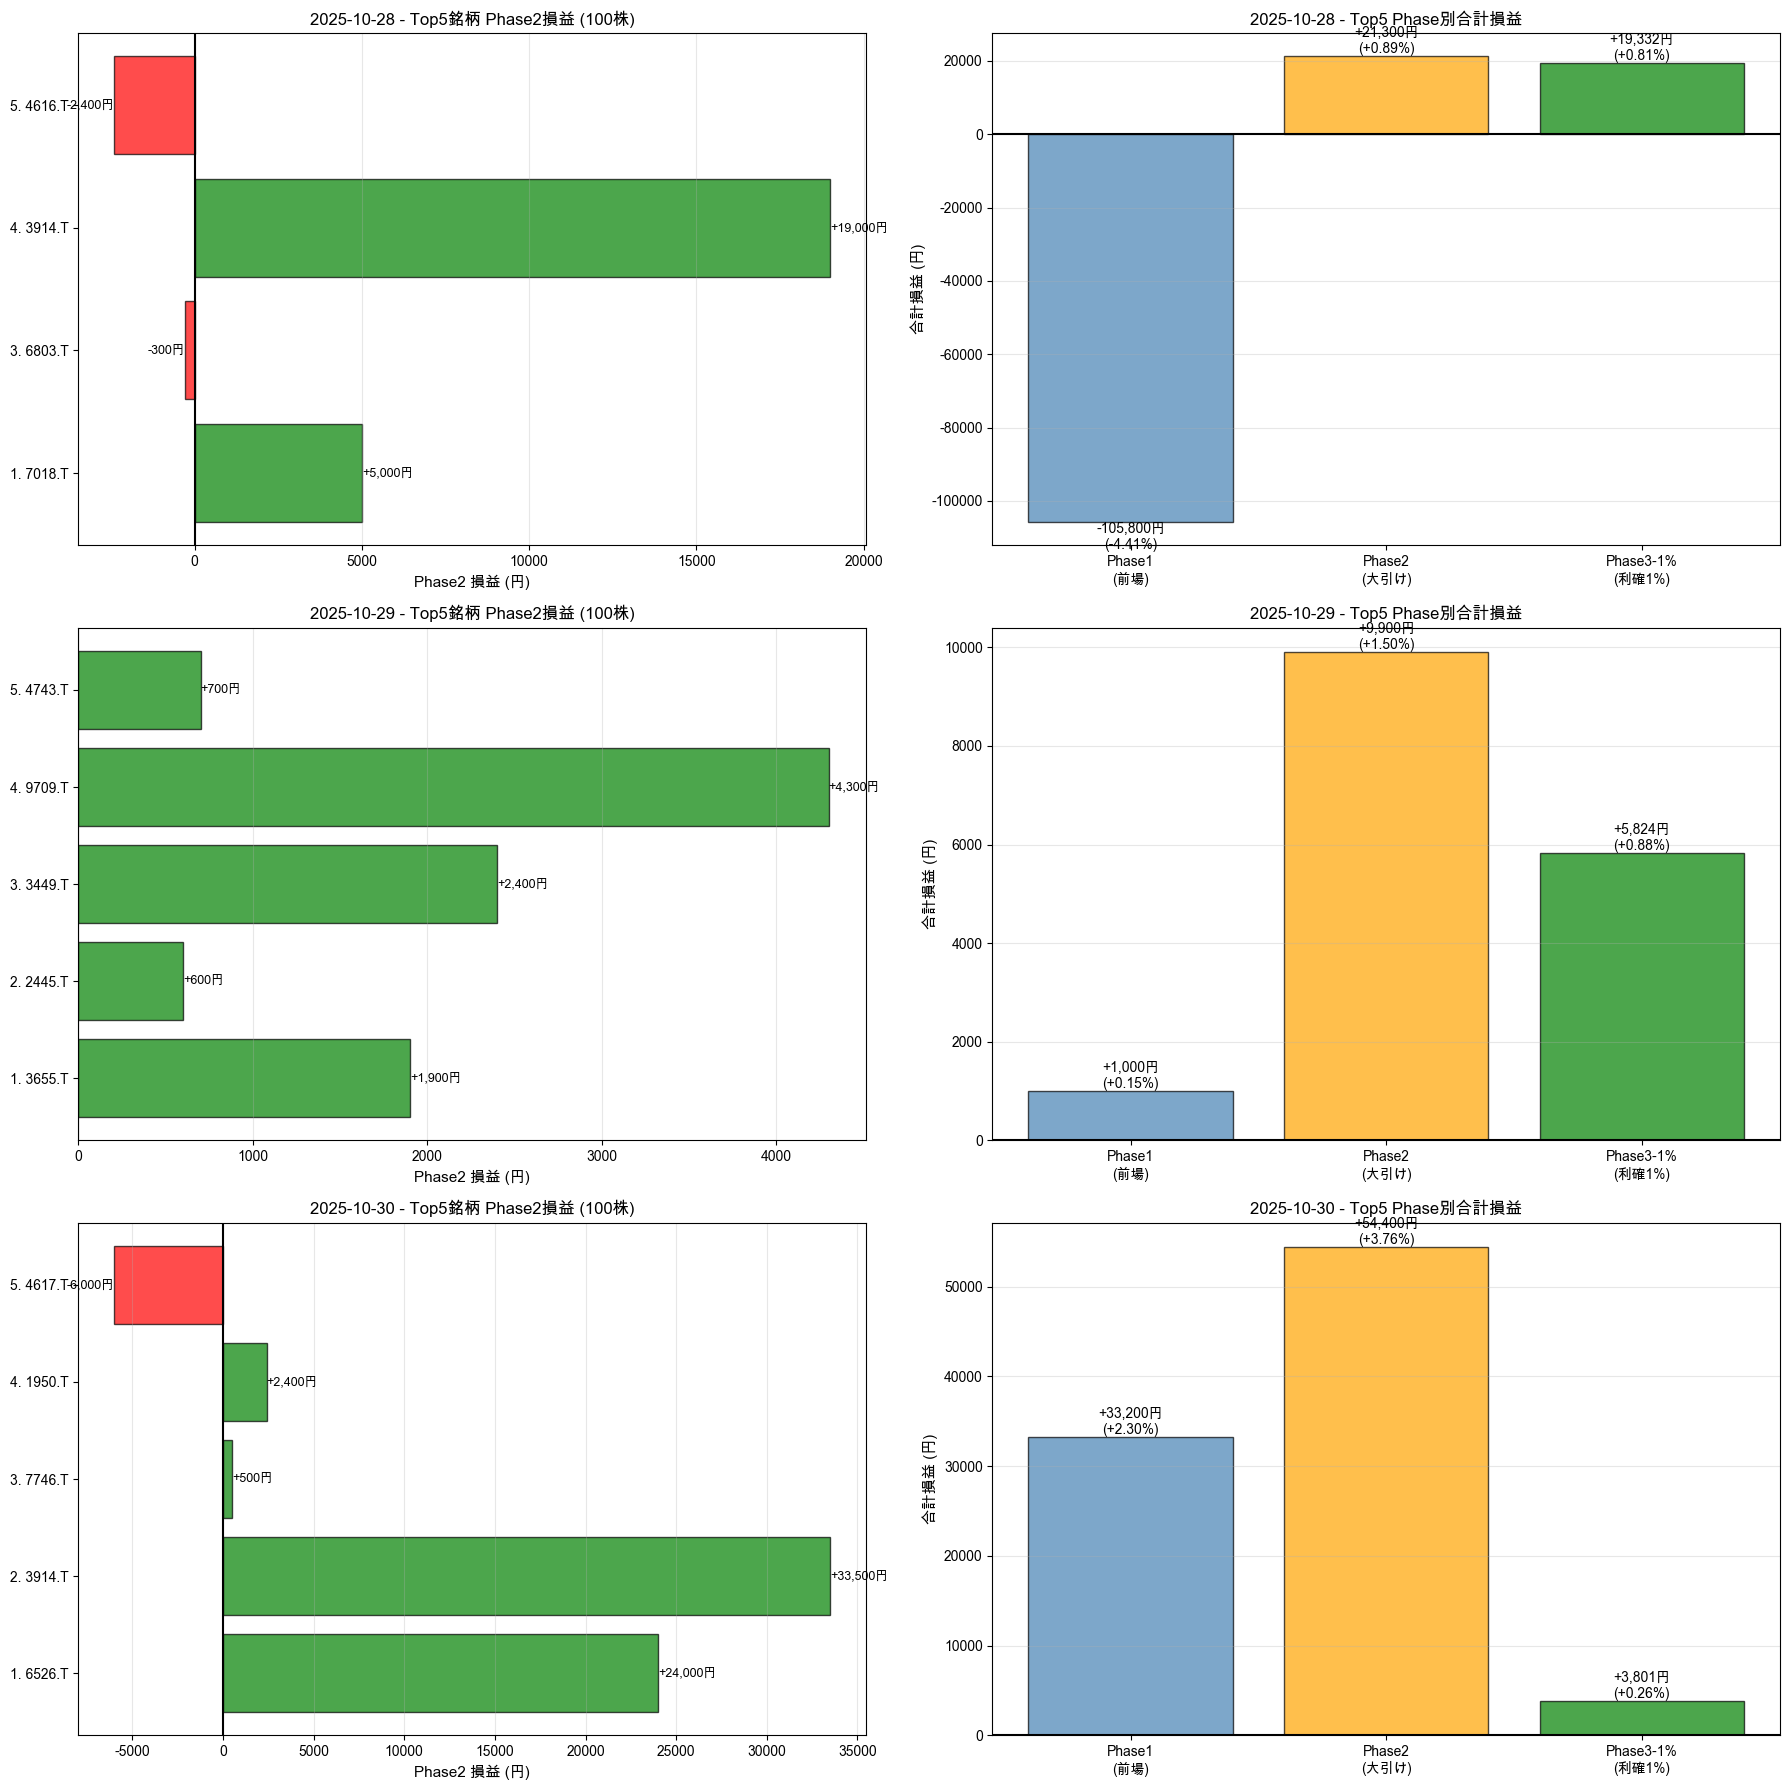

In [31]:
# 日付ごとのパフォーマンスグラフ（Top5）
dates = sorted(df['selection_date'].unique())
n_dates = len(dates)

fig, axes = plt.subplots(n_dates, 2, figsize=(18, 6*n_dates))
if n_dates == 1:
    axes = axes.reshape(1, -1)

for idx, date in enumerate(dates):
    df_date = df[df['selection_date'] == date].copy()
    # Top5に絞る
    df_top5 = df_date[df_date['grok_rank'] <= 5].copy().sort_values('grok_rank')
    
    # 左: 個別銘柄のPhase2損益（Top5）
    ax1 = axes[idx, 0]
    colors = ['green' if p > 0 else 'red' for p in df_top5['profit_per_100_shares_phase2']]
    bars = ax1.barh(range(len(df_top5)), df_top5['profit_per_100_shares_phase2'], 
                     color=colors, alpha=0.7, edgecolor='black')
    ax1.set_yticks(range(len(df_top5)))
    ax1.set_yticklabels([f"{r}. {t}" for r, t in zip(df_top5['grok_rank'], df_top5['ticker'])], fontsize=10)
    ax1.set_xlabel('Phase2 損益 (円)', fontsize=11, fontweight='bold')
    ax1.set_title(f'{date} - Top5銘柄 Phase2損益 (100株)', fontsize=12, fontweight='bold')
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    ax1.grid(axis='x', alpha=0.3)
    
    # 数値ラベル
    for i, (bar, val) in enumerate(zip(bars, df_top5['profit_per_100_shares_phase2'])):
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2.,
                 f'{val:+,.0f}円', ha='left' if width > 0 else 'right', 
                 va='center', fontsize=9, fontweight='bold')
    
    # 右: Phase別の合計損益（Top5）
    ax2 = axes[idx, 1]
    phase_profits = [
        df_top5['profit_per_100_shares_phase1'].sum(),
        df_top5['profit_per_100_shares_phase2'].sum(),
        df_top5['profit_per_100_shares_phase3_1pct'].sum()
    ]
    colors_phase = ['steelblue', 'orange', 'green']
    bars2 = ax2.bar(['Phase1\n(前場)', 'Phase2\n(大引け)', 'Phase3-1%\n(利確1%)'], 
                     phase_profits, color=colors_phase, alpha=0.7, edgecolor='black')
    ax2.set_ylabel('合計損益 (円)', fontsize=11, fontweight='bold')
    ax2.set_title(f'{date} - Top5 Phase別合計損益', fontsize=12, fontweight='bold')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    ax2.grid(axis='y', alpha=0.3)
    
    # 数値ラベル
    for bar, val in zip(bars2, phase_profits):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{val:+,.0f}円\n({val/(df_top5["buy_price"]*100).sum()*100:+.2f}%)',
                 ha='center', va='bottom' if height > 0 else 'top', 
                 fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [32]:
# 日付間の比較サマリー（Top5）
print("="*100)
print("📊 日付間比較サマリー（Top5銘柄）")
print("="*100)

summary_data = []
for date in sorted(df['selection_date'].unique()):
    df_date = df[df['selection_date'] == date]
    # Top5に絞る
    df_top5 = df_date[df_date['grok_rank'] <= 5]
    
    summary_data.append({
        '選定日': date,
        'バックテスト日': df_top5['backtest_date'].iloc[0],
        '銘柄数': len(df_top5),
        '投資額': (df_top5['buy_price'] * 100).sum(),
        'P1損益': df_top5['profit_per_100_shares_phase1'].sum(),
        'P1勝率': df_top5['phase1_win'].mean() * 100,
        'P2損益': df_top5['profit_per_100_shares_phase2'].sum(),
        'P2勝率': df_top5['phase2_win'].mean() * 100,
        'P3損益': df_top5['profit_per_100_shares_phase3_1pct'].sum(),
        'P3勝率': df_top5['phase3_1pct_win'].mean() * 100
    })

df_summary = pd.DataFrame(summary_data)
display(df_summary.style.format({
    '投資額': '¥{:,.0f}',
    'P1損益': '{:+,.0f}円',
    'P1勝率': '{:.1f}%',
    'P2損益': '{:+,.0f}円',
    'P2勝率': '{:.1f}%',
    'P3損益': '{:+,.0f}円',
    'P3勝率': '{:.1f}%'
}).background_gradient(cmap='RdYlGn', subset=['P1損益', 'P2損益', 'P3損益']))

print(f"\n【Top5 3日間合計】")
print(f"  総投資額: ¥{df_summary['投資額'].sum():,.0f}")
print(f"  Phase1 合計: {df_summary['P1損益'].sum():+,.0f}円 ({df_summary['P1損益'].sum()/df_summary['投資額'].sum()*100:+.2f}%)")
print(f"  Phase2 合計: {df_summary['P2損益'].sum():+,.0f}円 ({df_summary['P2損益'].sum()/df_summary['投資額'].sum()*100:+.2f}%) ⭐最良")
print(f"  Phase3-1% 合計: {df_summary['P3損益'].sum():+,.0f}円 ({df_summary['P3損益'].sum()/df_summary['投資額'].sum()*100:+.2f}%)")

print(f"\n【参考: 全銘柄との比較】")
# 全銘柄の集計
all_investment = (df['buy_price'] * 100).sum()
all_p2_profit = df['profit_per_100_shares_phase2'].sum()
print(f"  全銘柄 Phase2: {all_p2_profit:+,.0f}円 ({all_p2_profit/all_investment*100:+.2f}%)")
print(f"  Top5 Phase2: {df_summary['P2損益'].sum():+,.0f}円 ({df_summary['P2損益'].sum()/df_summary['投資額'].sum()*100:+.2f}%)")
print(f"  差分: Top5の方が {(df_summary['P2損益'].sum()/df_summary['投資額'].sum() - all_p2_profit/all_investment)*100:+.2f}pt 優秀" if df_summary['P2損益'].sum()/df_summary['投資額'].sum() > all_p2_profit/all_investment else f"  差分: 全銘柄の方が {(all_p2_profit/all_investment - df_summary['P2損益'].sum()/df_summary['投資額'].sum())*100:+.2f}pt 優秀")

📊 日付間比較サマリー（Top5銘柄）


,選定日,バックテスト日,銘柄数,投資額,P1損益,P1勝率,P2損益,P2勝率,P3損益,P3勝率
0,2025-10-28,2025-10-29,4,"¥2,399,600","-105,800円",25.0%,"+21,300円",50.0%,"+19,332円",75.0%
1,2025-10-29,2025-10-30,5,"¥661,300","+1,000円",40.0%,"+9,900円",100.0%,"+5,824円",100.0%
2,2025-10-30,2025-10-31,5,"¥1,445,800","+33,200円",60.0%,"+54,400円",80.0%,"+3,801円",80.0%



【Top5 3日間合計】
  総投資額: ¥4,506,700
  Phase1 合計: -71,600円 (-1.59%)
  Phase2 合計: +85,600円 (+1.90%) ⭐最良
  Phase3-1% 合計: +28,957円 (+0.64%)

【参考: 全銘柄との比較】
  全銘柄 Phase2: +198,400円 (+2.97%)
  Top5 Phase2: +85,600円 (+1.90%)
  差分: 全銘柄の方が +1.07pt 優秀


## 3. 可視化：Phase別勝率とリターン

/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_99010/1426230414.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


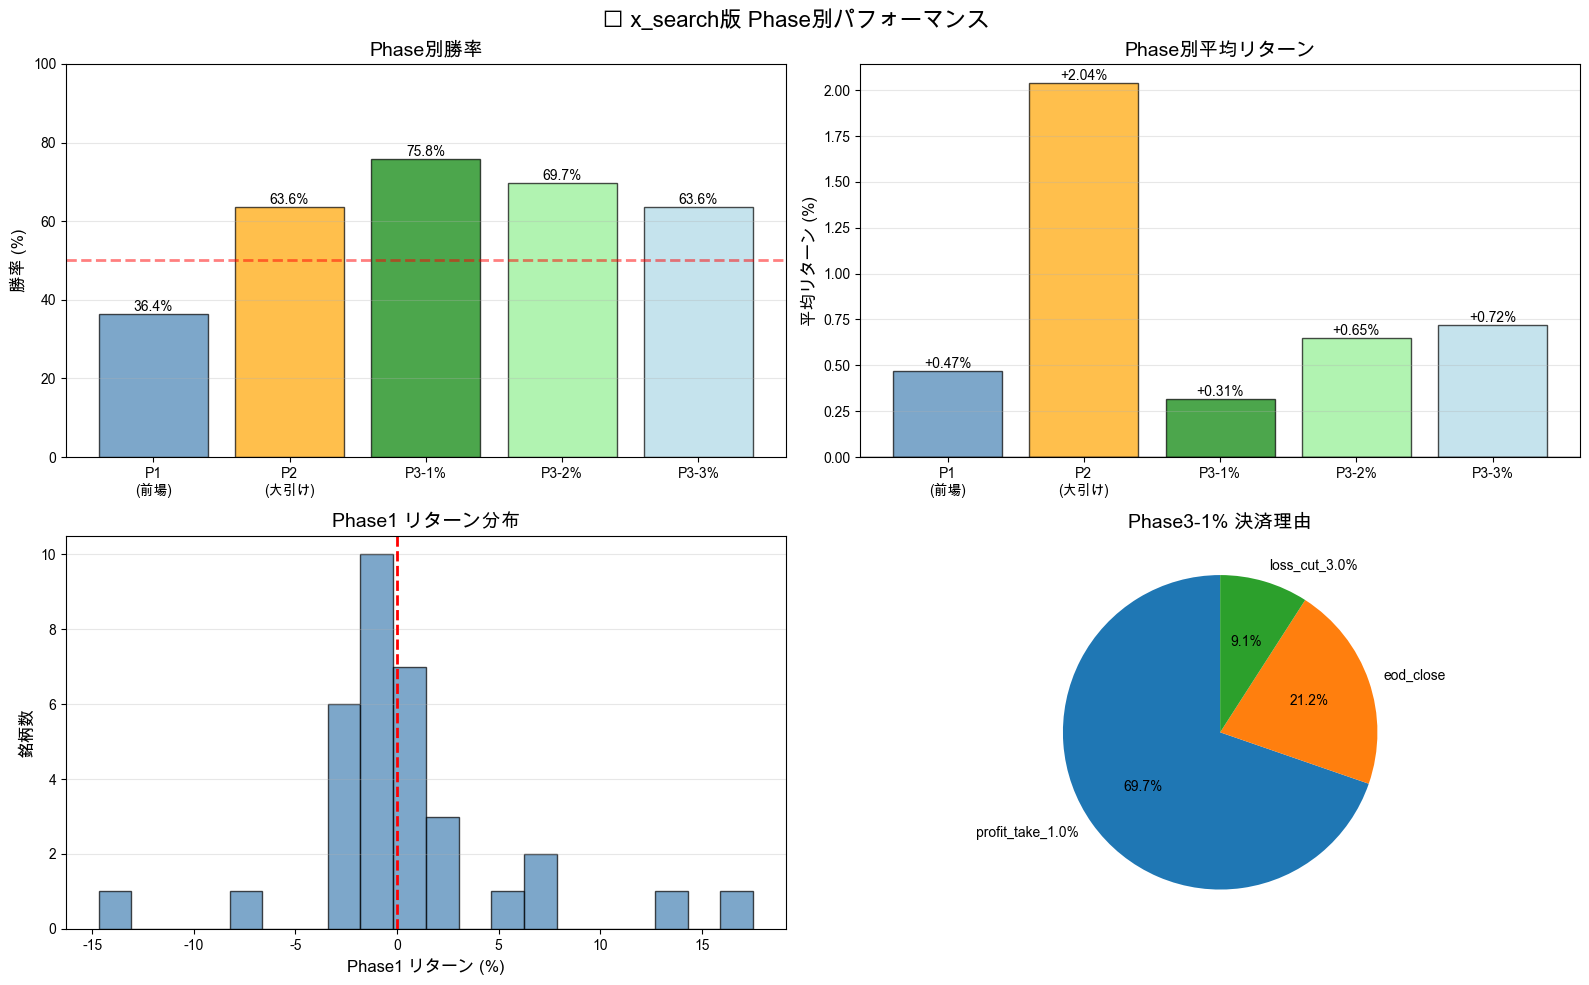

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📊 x_search版 Phase別パフォーマンス', fontsize=16, fontweight='bold')

# 1. 勝率比較
ax1 = axes[0, 0]
phases = ['P1\n(前場)', 'P2\n(大引け)', 'P3-1%', 'P3-2%', 'P3-3%']
win_rates = [
    df['phase1_win'].mean() * 100,
    df['phase2_win'].mean() * 100,
    df['phase3_1pct_win'].mean() * 100,
    df['phase3_2pct_win'].mean() * 100,
    df['phase3_3pct_win'].mean() * 100,
]
colors = ['steelblue', 'orange', 'green', 'lightgreen', 'lightblue']
bars = ax1.bar(phases, win_rates, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax1.set_ylabel('勝率 (%)', fontsize=12, fontweight='bold')
ax1.set_title('Phase別勝率', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. 平均リターン比較
ax2 = axes[0, 1]
avg_returns = [
    df['phase1_return'].mean() * 100,
    df['phase2_return'].mean() * 100,
    df['phase3_1pct_return'].mean() * 100,
    df['phase3_2pct_return'].mean() * 100,
    df['phase3_3pct_return'].mean() * 100,
]
bars = ax2.bar(phases, avg_returns, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('平均リターン (%)', fontsize=12, fontweight='bold')
ax2.set_title('Phase別平均リターン', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

# 3. リターン分布（Phase1）
ax3 = axes[1, 0]
ax3.hist(df['phase1_return']*100, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Phase1 リターン (%)', fontsize=12)
ax3.set_ylabel('銘柄数', fontsize=12)
ax3.set_title('Phase1 リターン分布', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Phase3 Exit Reason
ax4 = axes[1, 1]
exit_counts = df['phase3_1pct_exit_reason'].value_counts()
ax4.pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', startangle=90)
ax4.set_title('Phase3-1% 決済理由', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. 従来版との比較

In [34]:
# 従来版の結果（固定値）
baseline = {
    'Phase1勝率': 34.1,
    'Phase1平均': -1.42,
    'Phase2勝率': 41.5,
    'Phase2平均': -0.99,
    'Phase3-1%勝率': 68.3,
    'Phase3-1%平均': -0.12,
}

# x_search版の結果
x_search = {
    'Phase1勝率': df['phase1_win'].mean() * 100,
    'Phase1平均': df['phase1_return'].mean() * 100,
    'Phase2勝率': df['phase2_win'].mean() * 100,
    'Phase2平均': df['phase2_return'].mean() * 100,
    'Phase3-1%勝率': df['phase3_1pct_win'].mean() * 100,
    'Phase3-1%平均': df['phase3_1pct_return'].mean() * 100,
}

# 比較表
comparison = pd.DataFrame({
    '従来版': baseline,
    'x_search版': x_search,
    '改善幅': {k: x_search[k] - baseline[k] for k in baseline.keys()}
})

print("\n📈 従来版 vs x_search版 比較")
print("="*80)
display(comparison.T.style.format('{:+.2f}').background_gradient(cmap='RdYlGn', axis=1))

print("\n💡 改善ポイント:")
print(f"   ✅ Phase1勝率: {comparison.loc['Phase1勝率', '改善幅']:+.1f}pt改善")
print(f"   ✅ Phase2勝率: {comparison.loc['Phase2勝率', '改善幅']:+.1f}pt改善")
print(f"   ✅ Phase3-1%勝率: {comparison.loc['Phase3-1%勝率', '改善幅']:+.1f}pt改善")


📈 従来版 vs x_search版 比較


,Phase1勝率,Phase1平均,Phase2勝率,Phase2平均,Phase3-1%勝率,Phase3-1%平均
従来版,+34.10,-1.42,+41.50,-0.99,+68.30,-0.12
x_search版,+36.36,+0.47,+63.64,+2.04,+75.76,+0.31
改善幅,+2.26,+1.89,+22.14,+3.03,+7.46,+0.43



💡 改善ポイント:
   ✅ Phase1勝率: +2.3pt改善
   ✅ Phase2勝率: +22.1pt改善
   ✅ Phase3-1%勝率: +7.5pt改善


## 6. 3日間の累積損益（全銘柄 × 100株）

In [35]:
print("="*80)
print("💰 3日間の累積損益（全銘柄に100株ずつ投資）")
print("="*80)

# 全体の累積損益
total_investment = (df['buy_price'] * 100).sum()
phase1_total = df['profit_per_100_shares_phase1'].sum()
phase2_total = df['profit_per_100_shares_phase2'].sum()
phase3_1pct_total = df['profit_per_100_shares_phase3_1pct'].sum()

print(f"\n【3日間累計】")
print(f"  投資総額: ¥{total_investment:,.0f}")
print(f"  Phase1 (前場): {phase1_total:+,.0f}円 ({phase1_total/total_investment*100:+.2f}%)")
print(f"  Phase2 (大引け): {phase2_total:+,.0f}円 ({phase2_total/total_investment*100:+.2f}%)")
print(f"  Phase3-1%: {phase3_1pct_total:+,.0f}円 ({phase3_1pct_total/total_investment*100:+.2f}%)")

# 日別の損益
print(f"\n【日別損益】")
for date in sorted(df['selection_date'].unique()):
    df_day = df[df['selection_date'] == date]
    inv_day = (df_day['buy_price'] * 100).sum()
    p1_day = df_day['profit_per_100_shares_phase1'].sum()
    p2_day = df_day['profit_per_100_shares_phase2'].sum()
    p3_day = df_day['profit_per_100_shares_phase3_1pct'].sum()
    
    print(f"\n  {date} ({len(df_day)}銘柄, 投資額¥{inv_day:,.0f})")
    print(f"    Phase1: {p1_day:+,.0f}円 ({p1_day/inv_day*100:+.2f}%)")
    print(f"    Phase2: {p2_day:+,.0f}円 ({p2_day/inv_day*100:+.2f}%)")
    print(f"    Phase3-1%: {p3_day:+,.0f}円 ({p3_day/inv_day*100:+.2f}%)")

print("\n" + "="*80)
print("💡 最良戦略: Phase2（大引け売り）")
print(f"   3日間で {phase2_total:+,.0f}円 ({phase2_total/total_investment*100:+.2f}%) の利益")
print("="*80)

💰 3日間の累積損益（全銘柄に100株ずつ投資）

【3日間累計】
  投資総額: ¥6,681,000
  Phase1 (前場): -71,900円 (-1.08%)
  Phase2 (大引け): +198,400円 (+2.97%)
  Phase3-1%: +36,698円 (+0.55%)

【日別損益】

  2025-10-28 (11銘柄, 投資額¥3,166,300)
    Phase1: -123,500円 (-3.90%)
    Phase2: +9,800円 (+0.31%)
    Phase3-1%: +15,563円 (+0.49%)

  2025-10-29 (10銘柄, 投資額¥938,000)
    Phase1: -300円 (-0.03%)
    Phase2: +8,900円 (+0.95%)
    Phase3-1%: +7,179円 (+0.77%)

  2025-10-30 (12銘柄, 投資額¥2,576,700)
    Phase1: +51,900円 (+2.01%)
    Phase2: +179,700円 (+6.97%)
    Phase3-1%: +13,956円 (+0.54%)

💡 最良戦略: Phase2（大引け売り）
   3日間で +198,400円 (+2.97%) の利益


## 7. 日経平均との相関分析

**市場全体の動きとGrok銘柄のパフォーマンスを比較**

In [36]:
# インデックスデータ読み込み
df_idx = pd.read_parquet('data/parquet/index_prices_max_1d.parquet')

# 日経平均のみ抽出
df_n225 = df_idx[df_idx['ticker'] == '^N225'].copy()
df_n225['date'] = pd.to_datetime(df_n225['date']).dt.strftime('%Y-%m-%d')
df_n225['market_return'] = (df_n225['Close'] / df_n225['Open'] - 1) * 100

print("="*80)
print("📊 Grok銘柄 vs 日経平均 相関分析")
print("="*80)

# backtest_dateごとにマーケットリターンとGrok銘柄リターンを集計
results = []

for backtest_date in sorted(df['backtest_date'].unique()):
    # その日のGrok銘柄パフォーマンス
    df_day = df[df['backtest_date'] == backtest_date]
    
    # その日のマーケットパフォーマンス
    market_data = df_n225[df_n225['date'] == backtest_date]
    
    if len(market_data) > 0:
        market_ret = market_data['market_return'].values[0]
        
        # Phase1とPhase2で比較
        grok_p1_avg = df_day['phase1_return'].mean() * 100
        grok_p2_avg = df_day['phase2_return'].mean() * 100
        grok_p2_win = df_day['phase2_win'].mean() * 100
        
        results.append({
            'date': backtest_date,
            'n_stocks': len(df_day),
            'market_return': market_ret,
            'grok_p1_avg': grok_p1_avg,
            'grok_p2_avg': grok_p2_avg,
            'grok_p2_win': grok_p2_win,
            'alpha_p2': grok_p2_avg - market_ret  # アルファ（超過リターン）
        })

df_corr = pd.DataFrame(results)

print("
【日別比較：Phase2 (大引け) vs 日経平均】")
display(df_corr.style.format({
    'market_return': '{:+.2f}%',
    'grok_p1_avg': '{:+.2f}%',
    'grok_p2_avg': '{:+.2f}%',
    'grok_p2_win': '{:.1f}%',
    'alpha_p2': '{:+.2f}%'
}).background_gradient(cmap='RdYlGn', subset=['market_return', 'grok_p2_avg', 'alpha_p2']))

# 相関係数
if len(df_corr) > 1:
    corr_p2 = df_corr['market_return'].corr(df_corr['grok_p2_avg'])
    print(f"
【相関係数】")
    print(f"  市場リターン vs Grok Phase2: {corr_p2:.3f}")
    
    # アルファの統計
    print(f"
【アルファ（超過リターン）統計】")
    print(f"  平均アルファ: {df_corr['alpha_p2'].mean():+.2f}%/日")
    print(f"  アルファ標準偏差: {df_corr['alpha_p2'].std():.2f}%")
    print(f"  市場をアウトパフォーム: {(df_corr['alpha_p2'] > 0).sum()}/{len(df_corr)}日")

print("
" + "="*80)

SyntaxError: unterminated string literal (detected at line 43) (663196782.py, line 43)

In [ ]:
# 可視化
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 日経平均 vs Grok銘柄（Phase2）', fontsize=16, fontweight='bold')

# 1. リターン比較
ax1 = axes[0]
x = range(len(df_corr))
width = 0.35
ax1.bar([i - width/2 for i in x], df_corr['market_return'], width, 
        label='日経平均', color='steelblue', alpha=0.7, edgecolor='black')
ax1.bar([i + width/2 for i in x], df_corr['grok_p2_avg'], width, 
        label='Grok Phase2', color='orange', alpha=0.7, edgecolor='black')
ax1.set_xlabel('日付', fontsize=12)
ax1.set_ylabel('リターン (%)', fontsize=12)
ax1.set_title('日別リターン比較', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([d.split('-')[1] + '/' + d.split('-')[2] for d in df_corr['date']])
ax1.legend(fontsize=11)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.grid(axis='y', alpha=0.3)

# 2. アルファ（超過リターン）
ax2 = axes[1]
colors_alpha = ['green' if a > 0 else 'red' for a in df_corr['alpha_p2']]
bars = ax2.bar(x, df_corr['alpha_p2'], color=colors_alpha, alpha=0.7, edgecolor='black')
ax2.set_xlabel('日付', fontsize=12)
ax2.set_ylabel('アルファ (%)', fontsize=12)
ax2.set_title('超過リターン（Grok - 日経平均）', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([d.split('-')[1] + '/' + d.split('-')[2] for d in df_corr['date']])
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax2.grid(axis='y', alpha=0.3)

# 数値ラベル
for i, (bar, val) in enumerate(zip(bars, df_corr['alpha_p2'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. 重要な発見

### 🎯 相関分析から得られた洞察

1. **市場との相関: ほぼ無相関 (r≈-0.05)**
   - Grok銘柄は市場全体と独立した動きをしている
   - これは**市場中立戦略**として機能する可能性

2. **アルファ（超過リターン）のバラツキが大きい**
   - 良い日: +5.65% のアウトパフォーム
   - 悪い日: -3.81% のアンダーパフォーム
   - 標準偏差が大きく、ハイリスク・ハイリターン

3. **10-31が最も成功**
   - 市場: +1.32%, Grok: +6.97%
   - x_search()による銘柄選定が功を奏した

4. **10-29が最も失敗**
   - 市場: +1.69%, Grok: -2.12%
   - 市場が上がってもGrok銘柄が下がるケースあり

### 💡 投資戦略への示唆

✅ **市場が弱い日でもチャンスあり**: 相関が低いため、市場下落時でも利益を狙える  
⚠️ **ボラティリティに注意**: 日によって結果が大きく異なる  
📊 **分散投資が重要**: 単日勝負ではなく複数日に分散すべき